In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from IPython.display import clear_output
from time import sleep
from tqdm.notebook import tqdm

In [129]:
%matplotlib inline

# Define basic functionalities of RBM

In [105]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


def boltzmann_step(v, b,W, do_random_sampling = True):
    h = W@v+b[:,None]
    p = sigmoid(h)
    if(do_random_sampling):
        temp = np.random.uniform(size=p.shape)
        y = np.where(p<temp,1,0)
    else:
        y=p
    return y



    
def BoltzmannSequence(v,c,b,W,drop_h_prime=False,do_random_sampling=True,
                      do_not_sample_h_prime=False,
                     do_not_sample_v_prime=False):
    
    h=boltzmann_step(v,b,W,do_random_sampling=do_random_sampling)
    if do_not_sample_v_prime:
        v_prime=boltzmann_step(h,c,W.T,do_random_sampling=False)
    else:
        v_prime=boltzmann_step(h,c,W.T,do_random_sampling=do_random_sampling)
        
    if  drop_h_prime:
        h_prime=np.zeros(np.shape(h))
    else:
        if do_not_sample_h_prime: 
            h_prime=boltzmann_step(v_prime,b,W,do_random_sampling=False)
        else:
            h_prime=boltzmann_step(v_prime,b,W,do_random_sampling=do_random_sampling)
        
    return(v,h,v_prime,h_prime)

def Train_step(v,c,b,W,do_random_sampling=True,do_not_sample_h_prime=False,
             do_not_sample_v_prime=False):
    
    n_exampels = v.shape[-1]
    
    v,h,v_prime,h_prime=BoltzmannSequence(v,c,b,W,do_random_sampling=do_random_sampling,
                                         do_not_sample_h_prime=do_not_sample_h_prime,
                                         do_not_sample_v_prime=do_not_sample_v_prime)
    
    db = np.mean(h_prime - h, axis=-1)
    dc = np.mean(v_prime - v, axis=-1)
    dw = (h@v.T - h_prime@v_prime.T)/n_exampels
    return( db,dc,dw)


# Load Mnist data_set

In [30]:
# Load the MNIST data using tensorflow/keras
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

X_train=X_train/256.
X_train=X_train.T
X_train=np.swapaxes(X_train,0,1)

# Visualize data

<IPython.core.display.Javascript object>


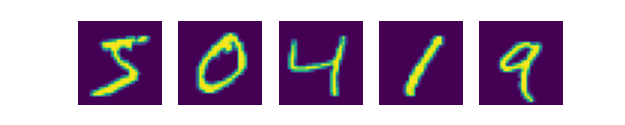

In [31]:
n_ims = 5
fig, axes = plt.subplots(ncols=n_ims,nrows=1,figsize=(n_ims,1))
for i in range(n_ims):
    axes[i].imshow(X_train[:,:,i])
    axes[i].axis('off')

In [32]:
def apply_threshold_to_x_data(x_train,threshold):
    result = np.where(x_train>threshold,1,0)
    result=np.int_(result)
    return result

In [33]:
X_train_digitized = apply_threshold_to_x_data(X_train, threshold=0.7)

<IPython.core.display.Javascript object>


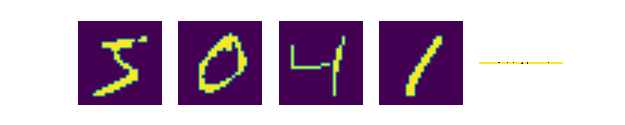

In [34]:
n_ims = 5
fig, axes = plt.subplots(ncols=n_ims,nrows=1,figsize=(n_ims,1))
for i in range(n_ims):
    axes[i].imshow(X_train_digitized[:,:,i])
    axes[i].axis('off')

# Training on digitized images

In [137]:
batchsize = 128 
n_train = 1000
n_vis = 28**2
n_hid = 40
total_number_of_examples = X_train.shape[-1]

c=np.random.randn(n_vis)
b=np.random.randn(n_hid)
W=0.01*np.random.randn(n_hid,n_vis)
alpha = 0.001


In [142]:
for epoch in tqdm(range(n_train)):
    randindex = np.random.randint(low=0,high=total_number_of_examples,size=batchsize)
    v=X_train_digitized[:,:,randindex]
    v = np.reshape(v,(n_vis,batchsize))
    db,dc,dw=Train_step(v,c,b,W)
    b+=alpha*db
    c+=alpha*dc
    W+=alpha*dw

<ipython-input-105-cd5cb3365c04>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


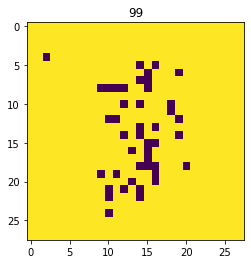

In [141]:
nsteps=100
num_samples=1
test_samples=np.zeros([n_vis,n_hid])
skipsteps=10
substeps=10 # how many steps to take before showing a new picture

v_prime=np.zeros(n_vis)
h=np.zeros(n_hid)
h_prime=np.zeros(n_hid)
for j in tqdm(range(nsteps)):
    for k in range(substeps):
        v,h,v_prime,h_prime=BoltzmannSequence(v,c,b,W,drop_h_prime=True) # step from v via h to v_prime!
    test_samples = v[:,1]
    
    v=np.copy(v_prime) # use the new v as a starting point for next step!
    if j%skipsteps==0 or j==nsteps-1:
        clear_output(wait=True)
        plt.imshow(np.reshape(test_samples,(28,28)))
        plt.title(j)
        plt.pause(0.1)
        
        

In [132]:
v.shape

(784, 128)

In [53]:
aa=np.reshape(a,(6,4))

In [56]:
aa[:,0]

array([ 0,  4,  8, 12, 16, 20])

In [61]:
W.shape

(40, 784)